<a href="https://colab.research.google.com/github/yogitaalone04-web/machine-learning-practicals/blob/main/Week3_Logistic_Regression_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CS24D017: Yogita Alone

AIM: To implement Logistic Regression for binary or multiclass classification problems and analyze the classification performance.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

# Load iris dataset
df = sns.load_dataset('iris')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
df.shape


(150, 5)

In [4]:
df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df['species'].unique()


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
df.isnull().sum()


,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [7]:
df = df[df['species'] != 'setosa']
df['species'].unique()
df.shape


(100, 5)

In [8]:
df['species'] = df['species'].map({'versicolor':0,'virginica':1})
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [9]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
print(X.head())
print(Y.head())


    sepal_length  sepal_width  petal_length  petal_width
50           7.0          3.2           4.7          1.4
51           6.4          3.2           4.5          1.5
52           6.9          3.1           4.9          1.5
53           5.5          2.3           4.0          1.3
54           6.5          2.8           4.6          1.5
50    0
51    0
52    0
53    0
54    0
Name: species, dtype: int64


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


(70, 4) (30, 4) (70,) (30,)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

classifier = LogisticRegression(solver='lbfgs', max_iter=200)  # stable for small datasets

parameters = {
    'C':[0.1, 1, 10, 100],    # regularization strength
    'max_iter':[200, 300]     # iterations
}

classifier_regressor = GridSearchCV(classifier, parameters, scoring='accuracy', cv=5)
classifier_regressor.fit(X_train, Y_train)

# Best parameters and score
print("\nBest Parameters:", classifier_regressor.best_params_)
print("Best Training Score:", classifier_regressor.best_score_)


Best Parameters: {'C': 100, 'max_iter': 200}
Best Training Score: 0.9857142857142858


In [15]:
y_pred = classifier_regressor.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

score = accuracy_score(Y_test, y_pred)
print("Accuracy:", score)

print(classification_report(Y_test, y_pred))


Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.92      0.92      0.92        13

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



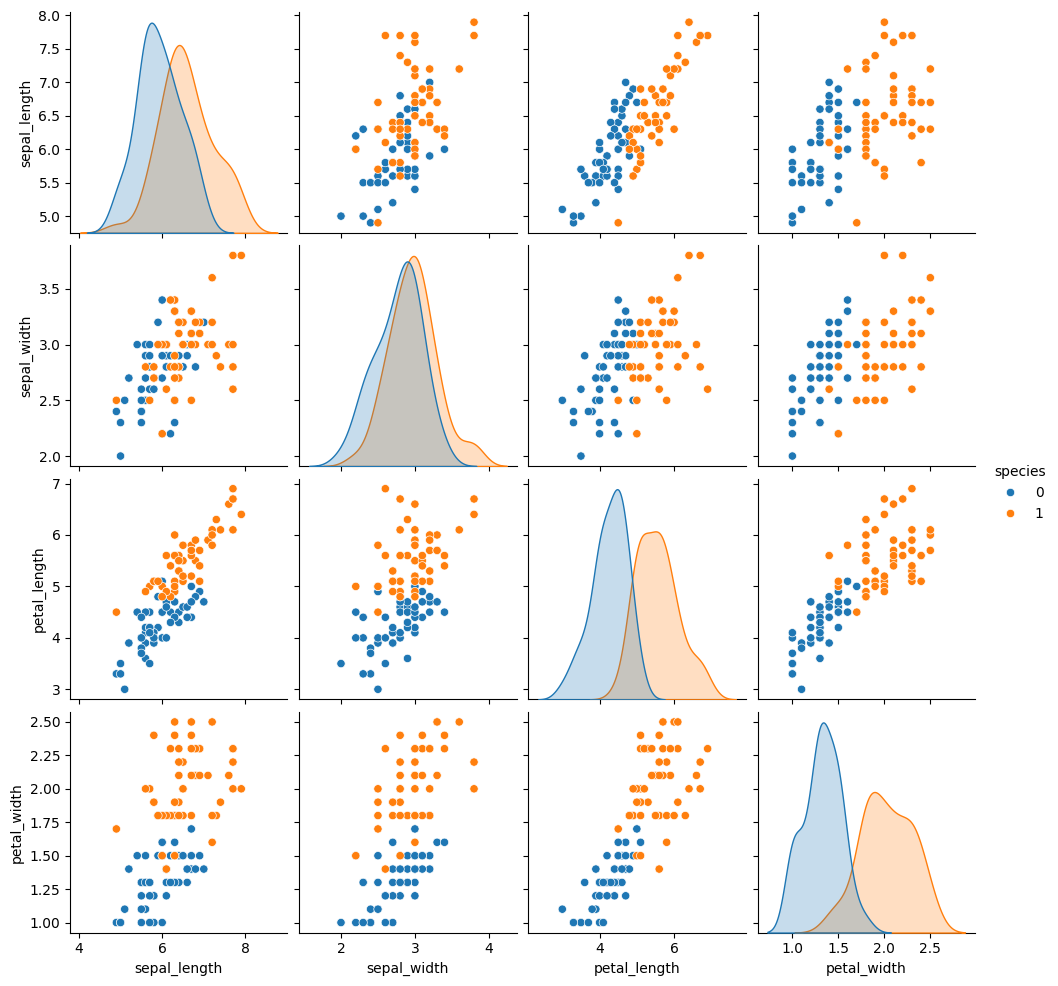

In [16]:
import seaborn as sns
sns.pairplot(df, hue='species')


In [17]:
df.corr()


,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,0.553855,0.828479,0.593709,0.494305
sepal_width,0.553855,1.000000,0.519802,0.566203,0.308080
petal_length,0.828479,0.519802,1.000000,0.823348,0.786424
petal_width,0.593709,0.566203,0.823348,1.000000,0.828129
species,0.494305,0.308080,0.786424,0.828129,1.000000
